In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

[[ 4  9  0 ... 54 44 37]
 [ 0 10  9 ... 54 44 38]
 [30 13  8 ... 55 45 39]
 ...
 [ 4  4  4 ... 46 41 38]
 [ 4  4  4 ... 43 39 36]
 [ 4  4  4 ... 41 37 34]]


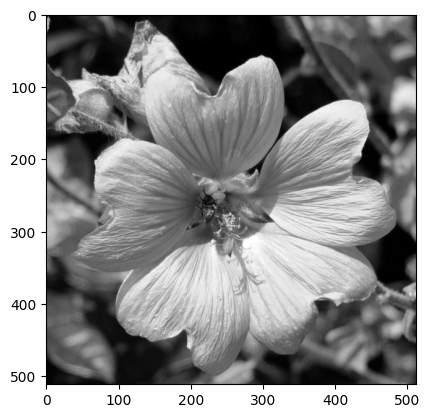

In [2]:
img = cv2.imread("flower.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

x = np.asarray(img)
print(x)

In [13]:
imageSet = []

imageSet.append(x)

for i in range(8):
    arr2d = []
    for j in range(len(x)):
        arr = []
        for k in range(len(x[j])):
            arr.append((x[j,k]&(1<<i)))
        arr2d.append(arr)
    temp = np.asarray(arr2d)
    imageSet.append(temp)

for i in range(len(imageSet)):
    img_name = str(i) + ".bmp"
    cv2.imwrite(img_name, imageSet[i])

In [15]:
def displayImage(imageSet):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(imageSet[i], cmap='gray')
        if i == 0:
            plt.title("Original Image")
        else :
            plt.title(f"For bit {i}")
    plt.show()
    plt.tight_layout()

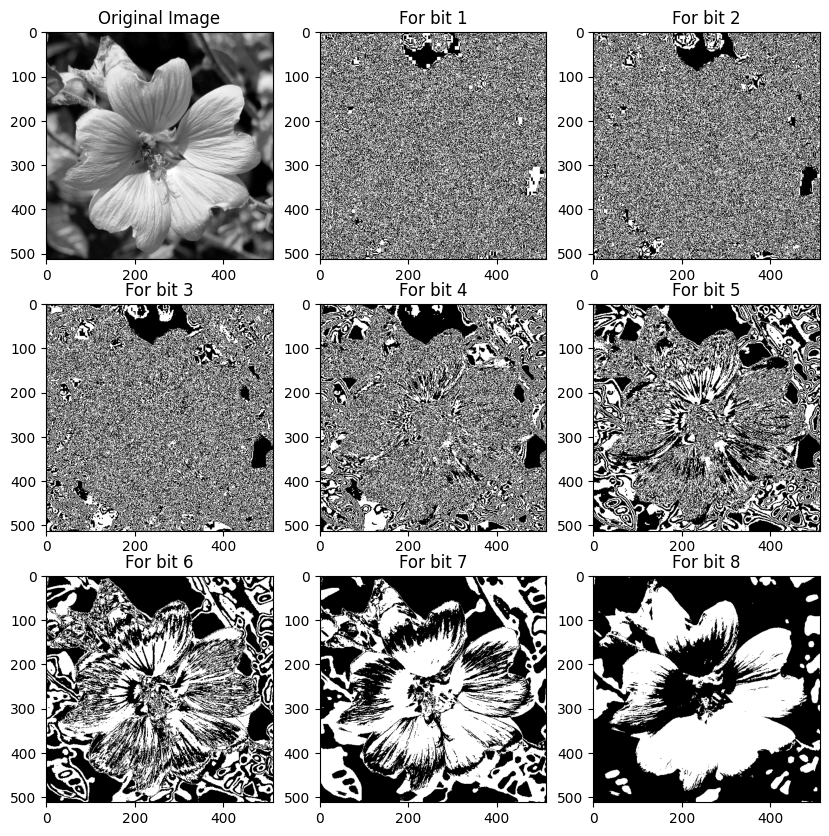

<Figure size 640x480 with 0 Axes>

In [16]:
displayImage(imageSet)

Print From LSB

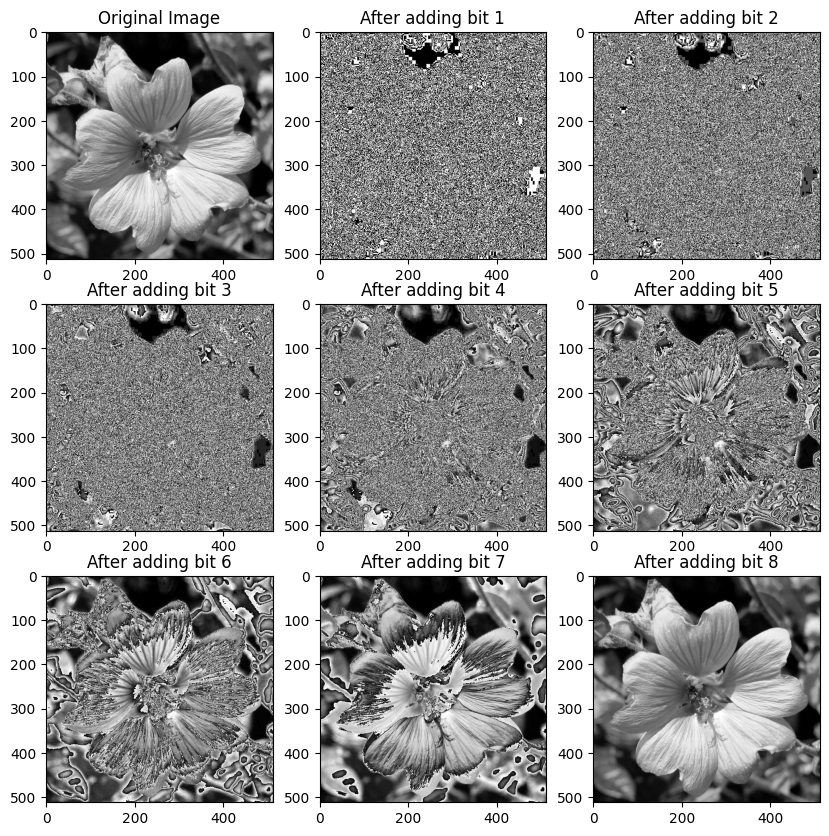

In [17]:
array = imageSet[1]
plt.figure(figsize=(10,10))

for i in range(9):
    
    if i>0:
        for j in range(len(imageSet[i])):
            arr = imageSet[i]
            for k in range(len(arr[j])):
                array[j,k] = array[j,k] | arr[j,k]
        plt.subplot(3,3,i+1)
        plt.imshow(array, cmap='gray')
        plt.title(f"After adding bit {i}")
    else:
        plt.subplot(3,3,i+1)
        plt.imshow(imageSet[0], cmap='gray')
        plt.title("Original Image")

From MSB

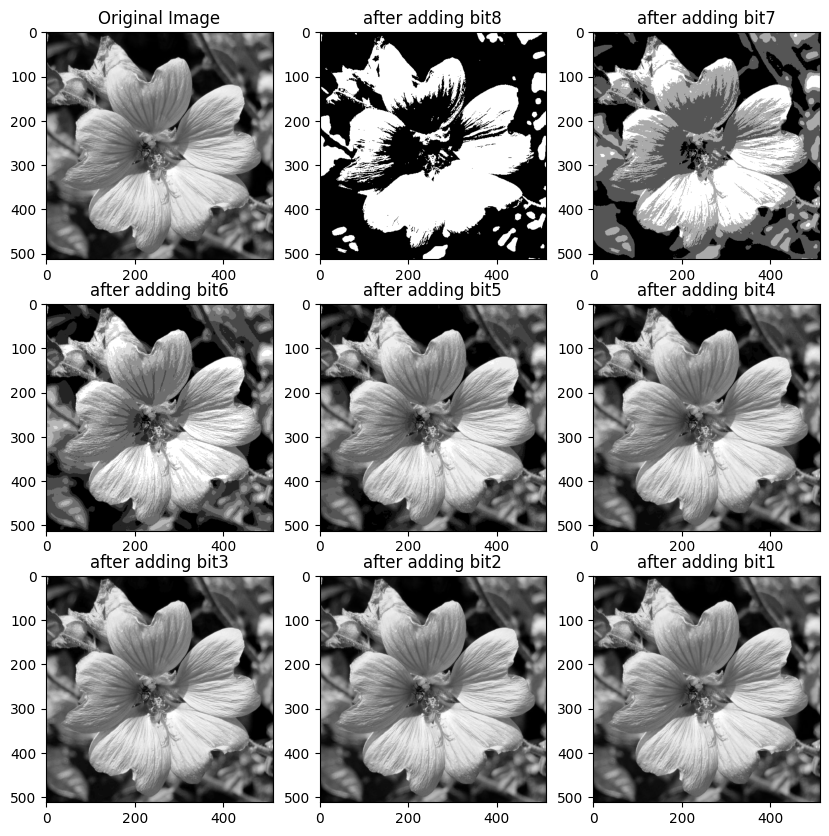

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.imshow(x, cmap='gray')
plt.title("Original Image")

imageSet = imageSet[::-1]
array = imageSet[0]
for i in range(8):
    for j in range(len(imageSet[i])):
        arr = imageSet[i]
        for k in range(len(arr[j])):
            array[j,k] = array[j,k] | arr[j,k]
    plt.subplot(3,3,i+2)
    plt.imshow(array, cmap='gray')
    plt.title(f"after adding bit{8-i}")
